# DEMO: Getting Started with the CAS Server

### 1. Import packages

Visit the documentation for the SWAT [(SAS Scripting Wrapper for Analytics Transfer)](https://sassoftware.github.io/python-swat/index.html) package.

In [4]:
import swat
import pandas as pd

### 2. Connect to the CAS server

a. Make a connection to the CAS server and name the variable **conn**. b. Then Print the value of the **conn** object. Notice the object contains connection information to the CAS server. A random session name and session id is assigned.

In [8]:
conn = swat.CAS('server.demo.sas.com', 30571, 'student', 'Metadata0')
conn

CAS('server.demo.sas.com', 30571, 'student', protocol='http', name='py-session-2', session='ded24a3c-385d-2e4b-94c2-cb49961ada64')

### 3. Explore the CAS Session Using CAS Actions

a. Use the [session.listSession](https://go.documentation.sas.com/doc/en/pgmsascdc/v_016/caspg/cas-session-listsessions.htm?homeOnFail) action to display a list of CAS sessions. Currently you should only have one CAS session. However, you can have multiple CAS sessions at a single time.

In [9]:
conn.listSessions()

,SessionName,UUID,State,Authentication,Userid
0,py-session-1:Wed Nov 10 13:13:10 2021,e3f68f67-0304-9344-89c5-f7df8852c247,Connected,OAuth,student


b. You can also specify the action set prior to the action. Throughout this course typically only the action name will be used.

In [10]:
conn.session.listSessions()

,SessionName,UUID,State,Authentication,Userid
0,py-session-1:Wed Nov 10 13:13:10 2021,e3f68f67-0304-9344-89c5-f7df8852c247,Connected,OAuth,student


c. Use the [sessionProp.listSessOpts](https://go.documentation.sas.com/doc/en/pgmsascdc/v_016/caspg/cas-sessionprop-listsessopts.htm) action to display the session options and session values.

In [11]:
conn.listSessOpts()

,Name,UsageType,Type,Value,Default Value,Group,Min,Max,Description
0,appTag,Session,String,,,Action,0,0,specifies the string to prefix to log messages.
1,caslib,Session,String,CASUSER(student),,Caslib,0,0,specifies the caslib name to set as the active...
2,collate,Session,String,UCA,UCA,Sort,0,0,specifies the collating sequence for sorting.
3,locale,Session,String,en_US,en_US,Localization,0,0,specifies the locale to use for sorting and fo...
4,logFlushTime,Session,Integer,100,100,Log,-1,86400,"specifies the log flush time, in milliseconds...."
5,yearcutoff,Session,Integer,1940,1940,Session,1582,19900,Specifies the first year of a 100-year span th...
6,maxTableMem,Session,Integer,16777216,16777216,Caslib,0,0,"specifies the maximum amount of memory, in byt..."
7,metrics,Session,Boolean,0,0,Log,0,1,"when set to True, action metrics are displayed."
8,nWorkers,Session,Integer,0,0,Session,0,5000,specifies the number of worker nodes associate...
9,subsetSessionCopies,Session,Integer,0,0,Session,0,5000,specifies number of backup copies of blocks fo...


d. Modify CAS session options using the [sessionProp.setSessOpt](https://go.documentation.sas.com/doc/en/pgmsascdc/v_016/caspg/cas-sessionprop-setsessopt.htm) action with the name of the option to modify. Here the **timeout** option is specified with a new value of *3600*. Then the listSessOpts action is executed to view the new value of **timeout**.

In [8]:
conn.setSessOpt(timeout=3600)
conn.listSessOpts()

,Name,UsageType,Type,Value,Default Value,Group,Min,Max,Description
0,appTag,Session,String,,,Action,0,0,specifies the string to prefix to log messages.
1,caslib,Session,String,CASUSER(student),,Caslib,0,0,specifies the caslib name to set as the active...
2,collate,Session,String,UCA,UCA,Sort,0,0,specifies the collating sequence for sorting.
3,locale,Session,String,en_US,en_US,Localization,0,0,specifies the locale to use for sorting and fo...
4,logFlushTime,Session,Integer,100,100,Log,-1,86400,"specifies the log flush time, in milliseconds...."
5,yearcutoff,Session,Integer,1940,1940,Session,1582,19900,Specifies the first year of a 100-year span th...
6,maxTableMem,Session,Integer,16777216,16777216,Caslib,0,0,"specifies the maximum amount of memory, in byt..."
7,metrics,Session,Boolean,0,0,Log,0,1,"when set to True, action metrics are displayed."
8,nWorkers,Session,Integer,0,0,Session,0,5000,specifies the number of worker nodes associate...
9,subsetSessionCopies,Session,Integer,0,0,Session,0,5000,specifies number of backup copies of blocks fo...


e. Use the [builtins.actionSetInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/v_016/caspg/cas-builtins-actionsetinfo.htm?homeOnFail) action to display all of the available action sets. By default actionSetInfo shows all loaded action sets. 

**NOTE:** Remember, think of an action set as a package, actions within an action set as methods.

In [9]:
conn.actionSetInfo()

,actionset,label,loaded,extension,version,product_name,user_defined
0,accessControl,Access Controls,1,tkacon,V.04.00M0P10172021,tkcas,false
1,accessControl,Access Controls,1,casmeta,V.04.00M0P10172021,tkcas,false
2,builtins,Builtins,1,tkcasablt,V.04.00M0P10172021,tkcas,false
3,configuration,Server Properties,1,tkcascfg,V.04.00M0P10172021,tkcas,false
4,dataPreprocess,Data Preprocess,1,tktrans,V.04.00M0P10172021,crsstat,false
5,dataStep,DATA Step,1,datastep,V.04.00M0P10172021,tkcas,false
6,percentile,Percentile,1,tkcasptl,V.04.00M0P10172021,crsstat,false
7,sccasl,CASL Server,1,tkcaslsc,V.04.00M0P10172021,tkcas,false
8,search,Search,1,casidx,V.04.00M0P10172021,crssearch,false
9,session,Session Methods,1,tkcsessn,V.04.00M0P10172021,tkcas,false


f. You can then use the help function to see the available actions within an action set.

In [10]:
help(conn.builtIns)

Help on Builtins in module swat.cas.actions object:

class Builtins(CASActionSet)
 |  Builtins
 |  
 |  Actions
 |  -------
 |  builtins.about                  : Shows the status of the server
 |  builtins.actionsetfromtable     : Restores a user-defined action set from a
 |                                    saved table
 |  builtins.actionsetinfo          : Shows the build information from loaded action
 |                                    sets
 |  builtins.actionsettotable       : Makes an in-memory table from a user-defined
 |                                    action set
 |  builtins.adduseractionsetpath   : Adds a caslib to the user-defined action set
 |                                    search path
 |  builtins.cascommon              : Provides parameters that are common to many
 |                                    actions
 |  builtins.defineactionset        : Defines a new user-defined action set
 |  builtins.describeactionset      : Describes a user-defined action set
 |  bu

g. In the actionSetInfo action add the **all** parameter with the value *True* to see all available action sets.

In [11]:
conn.actionsetInfo(all=True)

,actionset,label,loaded,extension,version,product_name,user_defined
0,access,,0,tkacon,V.04.00M0P10172021,tkcas,false
1,accessControl,Access Controls,1,casmeta,V.04.00M0P10172021,tkcas,false
2,activeLearn,,0,tkaluc,V.04.00M0P10172021,crsactivelrn,false
3,aggregation,,0,tkcasagg,V.04.00M0P10172021,crsaggregate,false
4,astore,,0,astore,V.04.00M0P10172021,crsastore,false
...,...,...,...,...,...,...,...
134,tsInfo,,0,tsinfo,V.04.00M0P10172021,crstmserinfo,false
135,tSne,,0,tsne,V.04.00M0P10172021,crstsne,false
136,tsReconcile,,0,tkrecfor,V.04.00M0P10172021,crsreconcile,false
137,uniTimeSeries,,0,cts,V.04.00M0P10172021,crsutmseries,false


### 3. Working with CAS Tables - Comparing the Pandas API and CAS Actions in the SWAT Package.

a. Reference a CAS table using the [CASTable](https://sassoftware.github.io/python-swat/generated/swat.cas.table.CASTable.html#swat.cas.table.CASTable) constructor. Print the value of the new **tbl** object. Notice it's a reference to an in-memory table in the CAS server. It does not store a table in the variable.

In [13]:
tbl = conn.CASTable('cars', caslib='casuser')
tbl

CASTable('cars', caslib='casuser')

**Use the SWAT package Pandas API on a CAS table**

b. Execute the familiar [head](https://sassoftware.github.io/python-swat/generated/swat.cas.table.CASTable.head.html#swat.cas.table.CASTable.head) method on the CAS table. The CAS server processes the data, then returns 5 rows to the client.

In [14]:
tbl.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


c. View the object type returned to the client from the head method. Notice it's a **SASDataFrame** object.

In [15]:
type(tbl.head())

swat.dataframe.SASDataFrame

#### NOTES:
A **SASDataFrame object**:
- is data that is local on the client. Remember that CAS can hold larger data than your local computer can handle.
- is a subclass of a Pandas DataFrame. You can work with them as you normally do a Pandas DataFrame.

d. Use the Pandas plot method on the **SASDataFrame** object to create a bar chart. Notice you can easily work with objects returned from the CAS server with familiar Python packages.

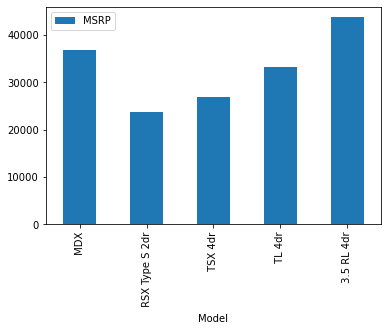

In [16]:
df = tbl.head()
df.plot(kind='bar', x='Model', y='MSRP');

e. Use the [value_counts](https://sassoftware.github.io/python-swat/generated/swat.cas.table.CASColumn.value_counts.html#swat.cas.table.CASColumn.value_counts) method on a **CASTable** object to return the number of unique values of a CAS table column. View the object type returned from the CAS server. Notice that the CAS server returns a **Series** object to the client.

In [19]:
s = tbl.Type.value_counts()

display(type(s))
display(s)

pandas.core.series.Series

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
dtype: int64

f. Use the value_counts method on a CAS table to return a **Series** object to the client. Then use the Pandas plot method on the client to plot the results.

<AxesSubplot:>

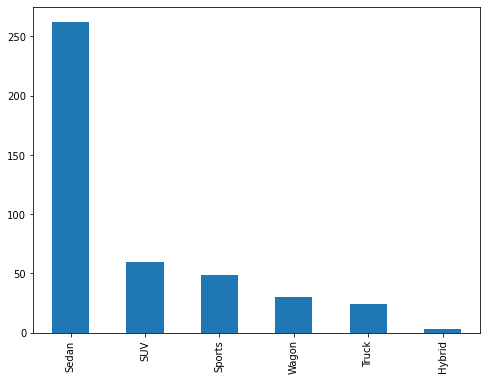

In [20]:
tbl.Type.value_counts().plot(kind='bar', figsize=(8,6))

g. Use the [shape](https://sassoftware.github.io/python-swat/generated/swat.cas.table.CASTable.shape.html#swat.cas.table.CASTable.shape) attribute to show the dimensions of the CAS table. Check the object type returned from the CAS server. Notice the shape attribute returns a **tuple**.

In [23]:
tbl.shape

(428, 15)

In [24]:
type(tbl.shape)

tuple

#### NOTES:
- A **CASTable** object is a reference to an in-memory table on the CAS server.
- The SWAT package API contains many of the methods defined by Pandas DataFrames. Using methods from the SWAT API will typically return a **CASTable**, **CASColumn**, **pandas.DataFrame**, **SASDataFrame**, or **pandas.Series** object to the client.
- Once summarized data is returned to the client, you can work with it as you normally would in Python.


**Use a CAS Action on a CAS Table**

h. Execute the [fetch](https://go.documentation.sas.com/doc/en/pgmsascdc/v_016/caspg/cas-table-fetch.htm?homeOnFail) action on a CAS table to return 5 rows. Notice there are a variety of ways to execute an action.

In [25]:
## Method 1
tbl.fetch(to=5)

## Method 2
#tbl.table.fetch(to=5)

## Method 3
#conn.fetch(tbl, to=5)

## Method 4
#conn.fetch(table={'name':'cars','caslib':'casuser'}, to=5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


i. View the object returned to the client from a CAS action. Notice it's a **CASResults** object (Python dictionary).

In [26]:
type(tbl.fetch(to=5))

swat.cas.results.CASResults

j. Store the **CASResults** object in a variable named **cr**. View the available keys in the **CASResults** object using the **keys** method. Notice the keys method returns a single key, *Fetch*. If you look at the output of the previous cell, you can see the key is located above the printed object.

In [27]:
cr = tbl.fetch(to=5)
cr.keys()

odict_keys(['Fetch'])

k. Call the *Fetch* key in the **CASResults** object to return the value the key holds. View the type of the returned object and display it. Notice it's a **CASResults** object that contains a **SASDataFrame**. 

In [25]:
display(type(cr['Fetch']))
cr['Fetch']

swat.dataframe.SASDataFrame

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


l. Call the *Fetch* key from the **CASResults** object to return the **SASDataFrame**. Once you have the **SASDataFrame** you can work with it as you would a Pandas DataFrame. Here the Pandas plot method is executed.

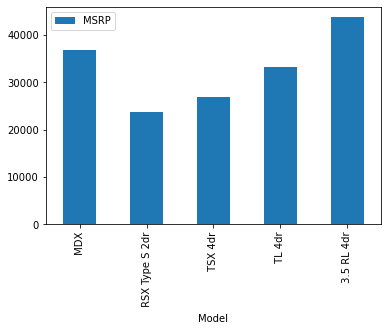

In [28]:
cr['Fetch'].plot(kind='bar', x='Model',y='MSRP');

#### NOTES:
- CAS actions interact with the CAS server and return a **CASResults** object. A **CASResults** object is simply an ordered Python dictionary with a few extra methods and attributes added.
- **CASResults** objects are local on the client.
- While all CAS actions return a **CASResults** object, there are no rules about how many keys are contained in the object, or what values are returned.


### 4. View the CAS API

a. To view what the CAS API is executing on the CAS server, you can enabling tracing of actions by turning on the **trade_actions** and **trace_ui_actions** options.

In [29]:
swat.options.cas.trace_actions = True      
swat.options.cas.trace_ui_actions = True

b. Execute the SWAT head method on the **CASTable** object. Notice the output shows what actions were executed on the CAS server. In this example, the head method executes the fetch action on the CAS server.

In [30]:
tbl.head()

[table.fetch]
    _apptag = 'UI'
    _messagelevel = 'error'
    from = 1
    index = True
    sastypes = False
    table.caslib = 'casuser'
    table.name = 'cars'
    to = 5



,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


c. Execute the value_counts method on the **CASTable** object. Notice the output shows that the columnInfo and freq actions were executed on the CAS server to produce similar results as the value_counts method.

In [31]:
tbl.Type.value_counts()

[table.columninfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'cars'

[simple.freq]
    _apptag = 'UI'
    _messagelevel = 'error'
    includemissing = False
    table.caslib = 'casuser'
    table.name = 'cars'



Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
dtype: int64

d. Execute the fetch CAS action on the **CASTable** object. Notice the output shows fetch action was executed on the CAS server.

In [32]:
tbl.fetch(to=5)

[table.fetch]
    sastypes = False
    table.caslib = 'casuser'
    table.name = 'cars'
    to = 5



,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


e. Set the **trace_actions** and **trace_ui_actions** options to the default *False* value.

In [33]:
swat.options.cas.trace_actions = False      
swat.options.cas.trace_ui_actions = False

### 5. Terminate the CAS Session

a. It's best practice to always terminate the CAS session when you are done.

In [34]:
conn.terminate()